In [2]:
pip install pandas seaborn matplotlib scipy

^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached s

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\EMC\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\_c_internal_utils.cp312-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Load the dataset from the local directory
df = pd.read_csv('income_data.csv')

# Check the first few rows of the dataset to understand its structure
df.head()

,age,workclass,annual-income,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Cleaning the data: Remove rows with missing or invalid 'annual-income' and 'age' values
df = df[['age', 'annual-income']].dropna()

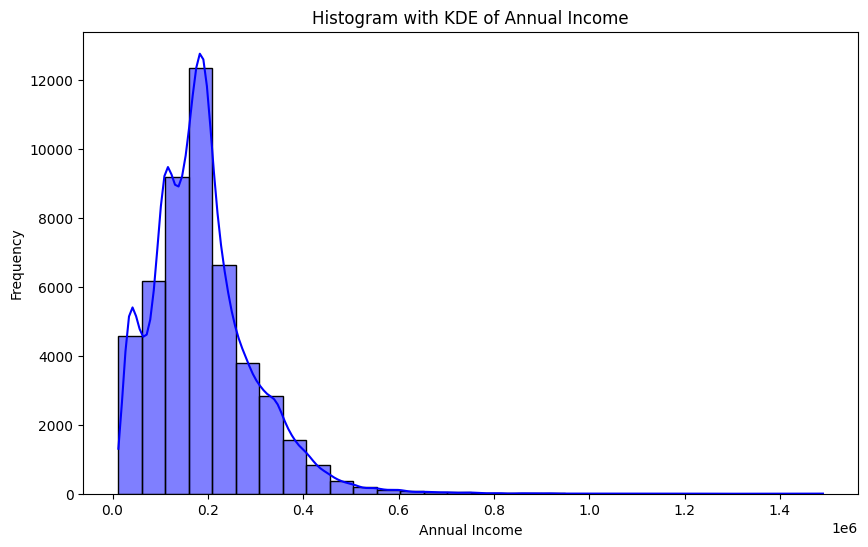

In [6]:
# Visualizing the distribution using a histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['annual-income'], kde=True, bins=30, color='blue')
plt.title('Histogram with KDE of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(df['annual-income'])
print(f"Shapiro-Wilk Test:\nStatistic: {shapiro_stat}, p-value: {shapiro_p_value}")
if shapiro_p_value > 0.05:
    print("The data is normally distributed according to Shapiro-Wilk test.")
else:
    print("The data is not normally distributed according to Shapiro-Wilk test.")

Shapiro-Wilk Test:
Statistic: 0.9227033853988447, p-value: 4.496168877456707e-90
The data is not normally distributed according to Shapiro-Wilk test.


In [8]:
# D'Agostino's K² Test for normality
dagostino_stat, dagostino_p_value = stats.normaltest(df['annual-income'])
print(f"\nD'Agostino's K² Test:\nStatistic: {dagostino_stat}, p-value: {dagostino_p_value}")
if dagostino_p_value > 0.05:
    print("The data is normally distributed according to D'Agostino's K² test.")
else:
    print("The data is not normally distributed according to D'Agostino's K² test.")


D'Agostino's K² Test:
Statistic: 15801.45152255299, p-value: 0.0
The data is not normally distributed according to D'Agostino's K² test.
